In [1]:
# Standard Imports
from os.path import join as pjoin
import sys
import warnings
sys.path.append("scripts")
warnings.filterwarnings("ignore")

# Relative Imports
from scripts import process

output_folder = pjoin("..", "data", "output")
text_include_folder = pjoin("..", "text", "src", "include")

Loaded sound "..\data\wav\A dur moderato.wav"
Duration: 18.26133333 s, samples: 876544, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

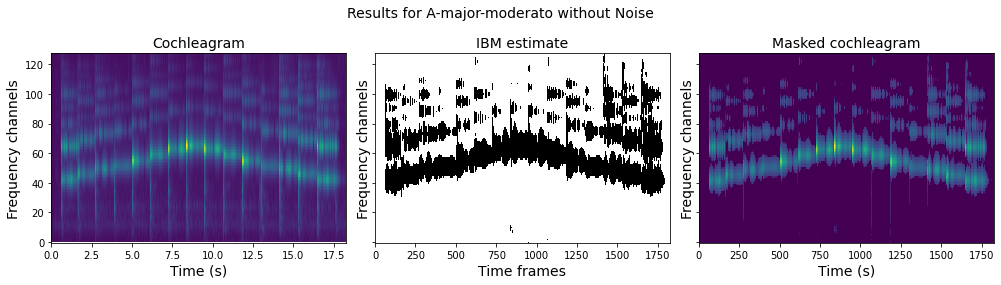

Execution time: 52.66549754142761 s


In [2]:
process("A dur moderato.wav", save_resynth=True,
        plot_title="Results for A-major-moderato without Noise")

### Experiments with White Noise

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

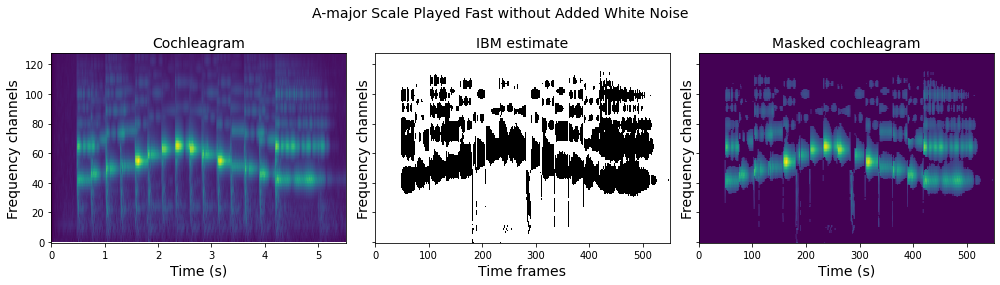

Execution time: 20.840548992156982 s


In [3]:
process("A dur rychle.wav",
        save_ibm=True, ibm_file_path=pjoin(output_folder, "A dur rychle.npy"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle Resynth.wav"),
        save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_white_noise_A-major_0.jpg"),
        plot_title="A-major Scale Played Fast without Added White Noise")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

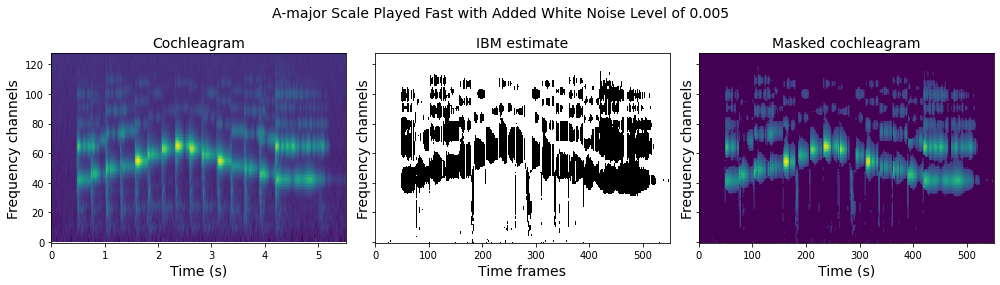

Execution time: 18.058597087860107 s


In [4]:
process("A dur rychle.wav", noise_level=0.005,
        save_noised=True, noised_file_path=pjoin(output_folder, "A dur rychle 0,005 Noised.wav"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle 0,005 Resynth.wav"),
        save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_white_noise_A-major_0,005.jpg"),
        plot_title="A-major Scale Played Fast with Added White Noise Level of 0.005")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

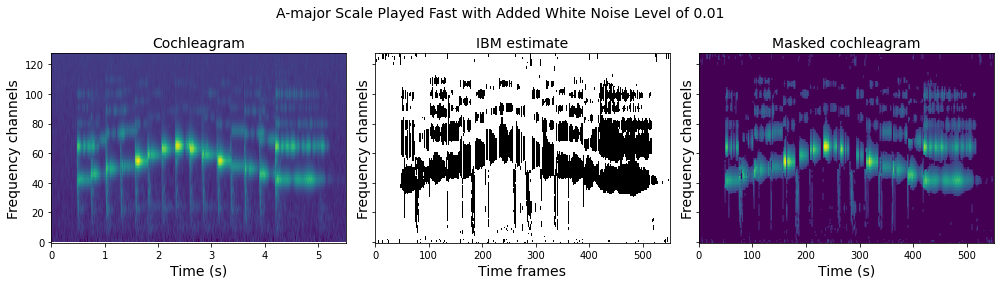

Execution time: 17.614362239837646 s


In [5]:
process("A dur rychle.wav", noise_level=0.01,
        save_noised=True, noised_file_path=pjoin(output_folder, "A dur rychle 0,01 Noised.wav"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle 0,01 Resynth.wav"),
        save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_white_noise_A-major_0,01.jpg"),
        plot_title="A-major Scale Played Fast with Added White Noise Level of 0.01")

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

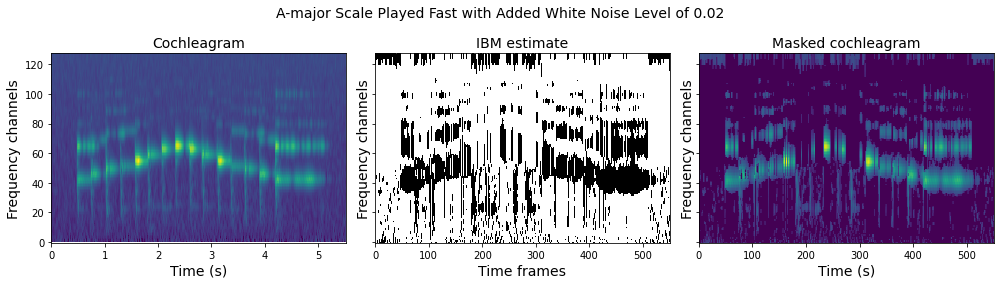

Execution time: 16.815975189208984 s


In [6]:
process("A dur rychle.wav", noise_level=0.02,
        save_noised=True, noised_file_path=pjoin(output_folder, "A dur rychle 0,02 Noised.wav"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle 0,02 Resynth.wav"),
        save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_white_noise_A-major_0,02.jpg"),
        plot_title="A-major Scale Played Fast with Added White Noise Level of 0.02",)

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

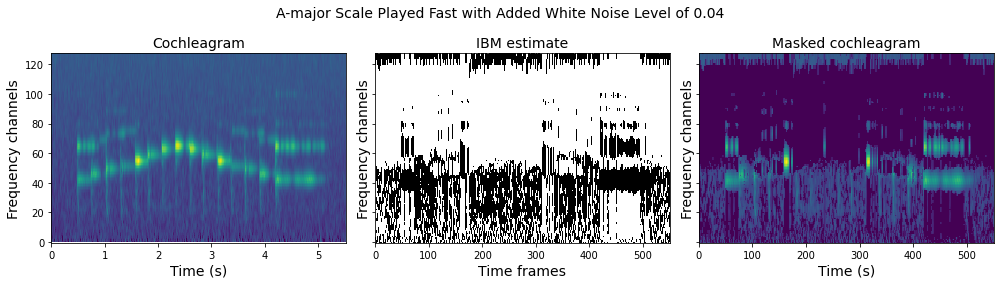

Execution time: 17.130040645599365 s


In [7]:
process("A dur rychle.wav", noise_level=0.04,
        save_noised=True, noised_file_path=pjoin(output_folder, "A dur rychle 0,04 Noised.wav"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle 0,04 Resynth.wav"),
        save_plot=True, plot_file_path=pjoin(text_include_folder, "experiments_white_noise_A-major_0,04.jpg"),
        plot_title="A-major Scale Played Fast with Added White Noise Level of 0.04")

[Next]

Loaded sound "..\data\wav\A dur rychle.wav"
Duration: 5.52533333 s, samples: 265216, samplerate: 48. kHz
Cochleagram... done! Loading IBM from "..\data\output\A dur rychle.npy"... done! Masking... done! Resynthesis... done! 

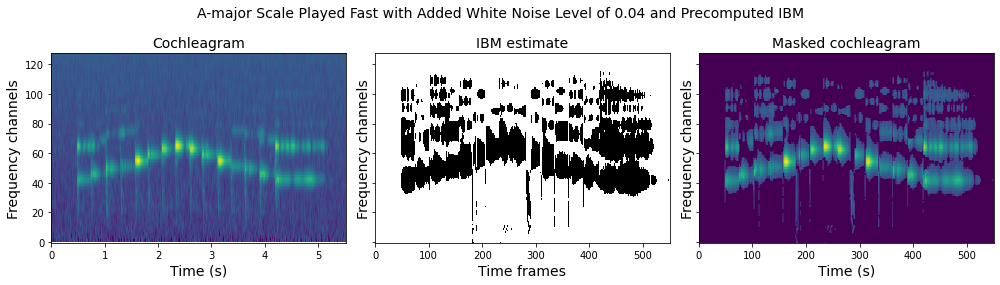

Execution time: 4.431022882461548 s


In [8]:
process("A dur rychle.wav", noise_level=0.04,
        load_ibm_from=pjoin(output_folder, "A dur rychle.npy"),
        save_resynth=True, resynth_file_path=pjoin(output_folder, "A dur rychle 0,04 Resynth Precomputed.wav"),
        plot_title="A-major Scale Played Fast with Added White Noise Level of 0.04 and Precomputed IBM")

[Next]

In [ ]:
process("A moll aiolská moderato.wav")

In [ ]:
process("A moll aiolská rychle.wav")

In [ ]:
process("A moll harmonická moderato.wav")

In [ ]:
process("A moll harmonická rychle.wav")

In [ ]:
process("A moll melodická moderato.wav")

In [ ]:
process("A moll melodická rychle.wav")

In [ ]:
process("C dur 1 opakování.wav")

In [ ]:
process("C dur 2 opakování.wav")

In [ ]:
process("C dur 3 opakování.wav")

In [ ]:
process("C dur malá opakování.wav")

In [ ]:
process("C dur moderato.wav")

In [ ]:
process("C dur rychle.wav")

In [ ]:
process("D dur moderato.wav")

In [ ]:
process("D dur rychle.wav")

In [ ]:
process("E dur moderato.wav")

In [ ]:
process("E dur rychle.wav")

In [ ]:
process("E moll aiolská moderato.wav")

In [ ]:
process("E moll aiolská rychle.wav")

In [ ]:
process("E moll harmonická moderato.wav")

In [ ]:
process("E moll harmonická rychle.wav")

In [ ]:
process("E moll melodická moderato.wav")

In [ ]:
process("E moll melodická rychle.wav")

In [ ]:
process("F dur moderato.wav")

In [ ]:
process("F dur rychle.wav")

In [ ]:
process("G dur moderato.wav")

In [ ]:
process("G dur rychle.wav")

In [ ]:
process("H dur moderato.wav")

In [ ]:
process("H dur rychle.wav")

### Experiments with number of harmonics

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

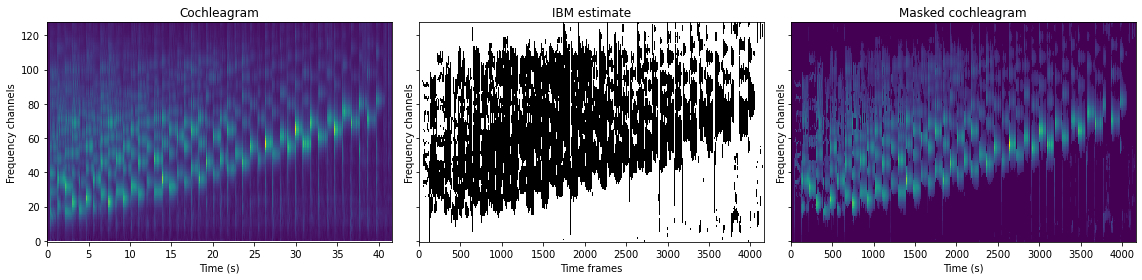

Execution time: 272.42327427864075 s


In [10]:
process("Kvarty od malé c bílá.wav", n_harmonics=1,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 1h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

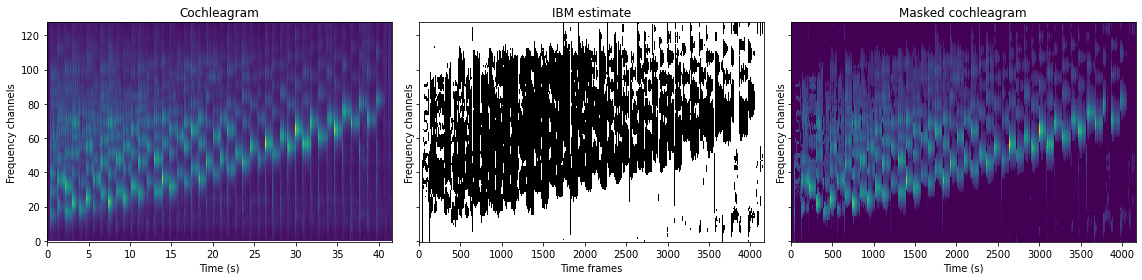

Execution time: 274.50964403152466 s


In [11]:
process("Kvarty od malé c bílá.wav", n_harmonics=2,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 2h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

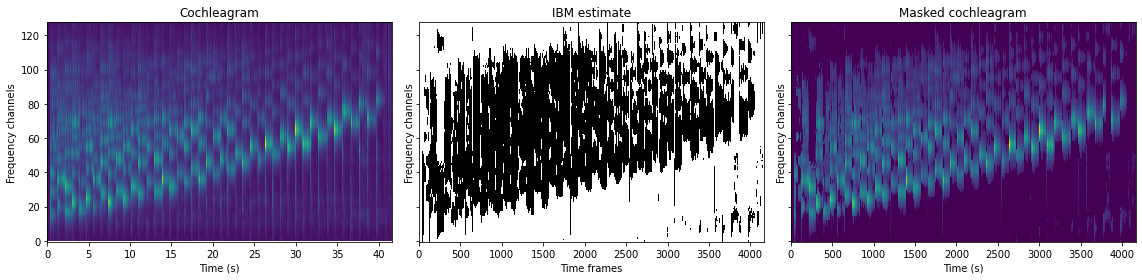

Execution time: 210.7246379852295 s


In [12]:
process("Kvarty od malé c bílá.wav", n_harmonics=3,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 3h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

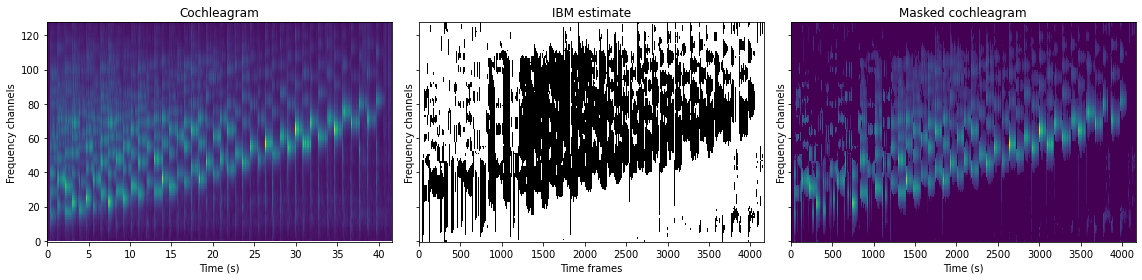

Execution time: 249.68189072608948 s


In [13]:
process("Kvarty od malé c bílá.wav", n_harmonics=5,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 5h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

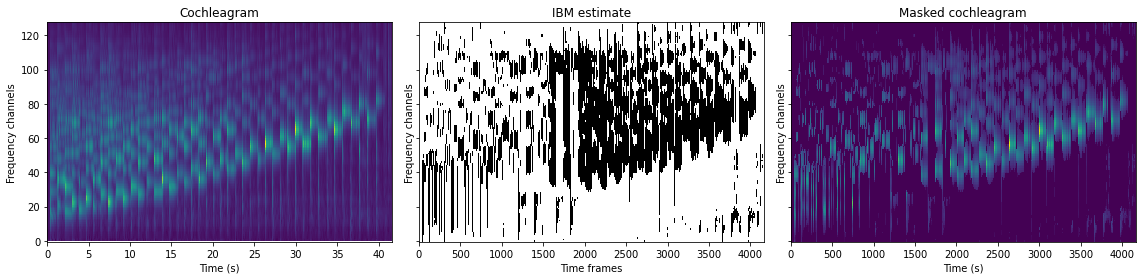

Execution time: 207.87590384483337 s


In [14]:
process("Kvarty od malé c bílá.wav", n_harmonics=7,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 7h Resynth.wav")

Loaded sound "..\data\wav\Kvarty od malé c bílá.wav"
Duration: 41.64266667 s, samples: 1998848, samplerate: 48. kHz
Cochleagram... done! Windowing... done! Correlogram... done! F0 estimates... done! IBM... done! Masking... done! Resynthesis... done! 

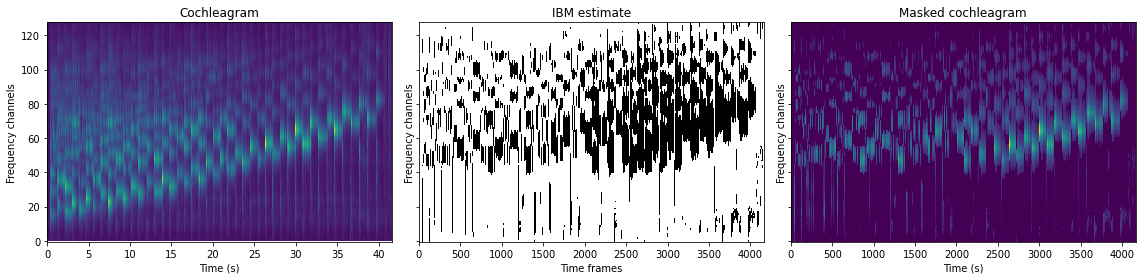

Execution time: 211.108656167984 s


In [15]:
process("Kvarty od malé c bílá.wav", n_harmonics=10,
        save_resynth=True, resynth_file_name="Kvarty od malé c bílá 10h Resynth.wav")

[Next]

In [9]:
process("Oktávy od malé c bílá.wav", save_resynth=True)

Loaded sound "..\data\wav\Oktávy od malé c bílá.wav"
Duration: 36.18133333 s, samples: 1736704, samplerate: 48. kHz
Cochleagram... 


KeyboardInterrupt



In [ ]:
process("Půl tóny 1 + 2.wav", noise_level=0.005, n_lags=500)

In [ ]:
process("Půl tóny Velká + Malá.wav", n_lags=500, save_resynth=True)